# Problema de Poisson

## Introducción al problema

El problema de Dirichlet para resolver la ecuación de Poisson en una región $R$ del plano es:
$$\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}=f(x,y)\qquad (x,y)\in R$$
$$u(x,y)=g(x,y)\qquad (x,y)\in\partial R$$
$$u(x,y)\mbox{ es contínua en }\bar{R}$$

Supongamos $R=]0,1[\times]0,1[$ y tomamos una malla de $M\times M$ nodos interiores.

La ecuación de Poisson tiene la discretización siguiente:
    $$v_{i-1,j}+v_{i+1,j}-4v_{i,j}+v_{i,j-1}+v_{i,j+1}=h^2f(x_i,y_j)$$
junto con las condiciones de frontera de Dirichlet:
$$v_{0j}=g(0,y_j),\qquad v_{M+1,j}=g(1,y_j)$$
$$v_{i0}=g(x_i,0),\qquad v_{i,M+1}=g(y_j,1)$$
para $i,j=1,\ldots,M$.

Notemos que con esta definición
$$h=\frac{1}{M+1}$$

## Librerias

In [1]:
import numpy as np
import matplotlib.pylab as plt

## Función Poisson

In [2]:
import Poisson

In [3]:
def f(x,y):
    return(x+y)

In [4]:
uh = Poisson.Poisson(f,f,3)

## Representación gráfica

In [5]:
def PintarMatriz(matriz):
    m = np.matrix(matriz)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    plt.imshow(m, interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
    plt.show()

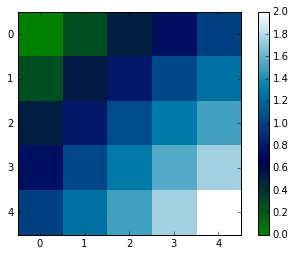

In [6]:
PintarMatriz(uh)

## Solución exacta

In [22]:
def uex(x,y):
    "Solución exacta que es cero en la frontera"
    return x*(x-1)*y*(y-1)/2

def laplace_uex(x,y):
    "Laplaciano de la solución exacta anterior"
    return y*(y-1)+x*(x-1)

def f_uex(x,y):
    "Segundo miembro para el que se tiene una solución exacta"
    return -laplace_uex(x,y)

M=20

## Comparar tiempos:  listas vs arrays

In [23]:
%timeit Poisson.Poisson(f_uex,uex,M)

1 loop, best of 3: 220 ms per loop


In [24]:
% timeit Poisson.PoissonNP(f_uex,uex,M)

100 loops, best of 3: 8.82 ms per loop


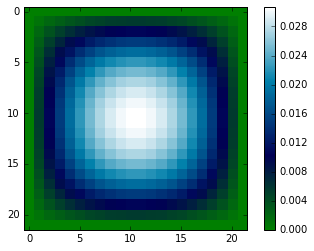

In [18]:
uh2 = Poisson.PoissonNP(f_uex,uex,M)
PintarMatriz(uh2)

## Calcular el error con la solución exacta

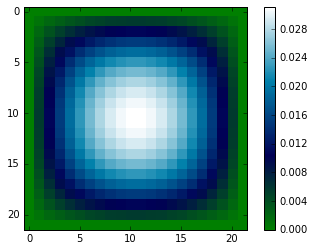

In [25]:
def uex_to_matrix(uex, M):
    "Stores exact solution uex in an MxM matrix"
    u_matrix = np.zeros((M+2,M+2))
    hx, hy = 1/(M+1), 1/(M+1)
    for i in range(M+2): # Bucle en filas
        for j in range(M+2): # Bucle en columnas
            u_matrix[i,j] = uex(i*hx,j*hy)
    return u_matrix
u_matrix = uex_to_matrix(uex, M)
PintarMatriz(u_matrix)

In [27]:
for M in [10,20,30,40,50]:
    print ("M =", M)
    uh_matrix = Poisson.PoissonNP(f_uex, uex, M, )
    u_matrix = uex_to_matrix(uex, M)
    print ("error =", norm(uh_matrix - u_matrix))
    print ("error_inf =", np.amax(abs(uh_matrix - u_matrix)) )

M = 10
error = 0.00292933519655
error_inf = 0.000521819247534
M = 20
error = 0.00391054203578
error_inf = 0.000370352692421
M = 30
error = 0.00503521214949
error_inf = 0.000324019040249
M = 40
error = 0.00619608250582
error_inf = 0.000301804499215
M = 50
error = 0.00737141472576
error_inf = 0.000288800946962


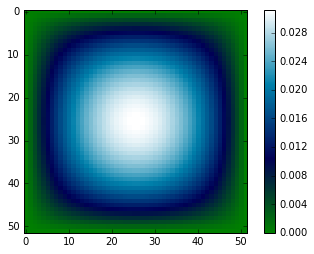

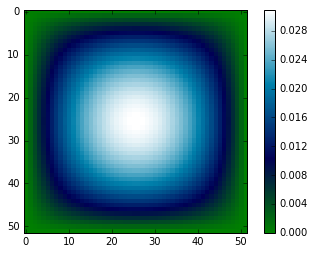

In [28]:
PintarMatriz(u_matrix)
PintarMatriz(uh_matrix)